In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
# read the dataset
df = pd.read_csv('insurance.csv')

In [32]:
df


,Age,Gender,BMI,Children,Smoker,Charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
570,31,female,29.100,0,no,3761.29200
571,18,female,37.290,1,no,2219.44510
572,30,female,43.120,2,no,4753.63680
573,62,female,36.860,1,no,31620.00106


In [34]:
df.head()

,Age,Gender,BMI,Children,Smoker,Charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [36]:
df.shape

(575, 6)

In [38]:
#check for null values in data set
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Charges     0
dtype: int64

In [40]:
df.describe()

,Age,BMI,Children,Charges
count,575.000000,575.000000,575.000000,575.000000
mean,39.566957,30.869748,1.059130,13327.333634
std,14.549637,5.921772,1.199586,12111.515239
min,18.000000,15.960000,0.000000,1137.011000
25%,27.000000,26.800000,0.000000,4676.998175
50%,40.000000,30.590000,1.000000,9563.029000
75%,52.500000,34.770000,2.000000,17083.173800
max,64.000000,49.060000,5.000000,63770.428010


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       575 non-null    int64  
 1   Gender    575 non-null    object 
 2   BMI       575 non-null    float64
 3   Children  575 non-null    int64  
 4   Smoker    575 non-null    object 
 5   Charges   575 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 27.1+ KB


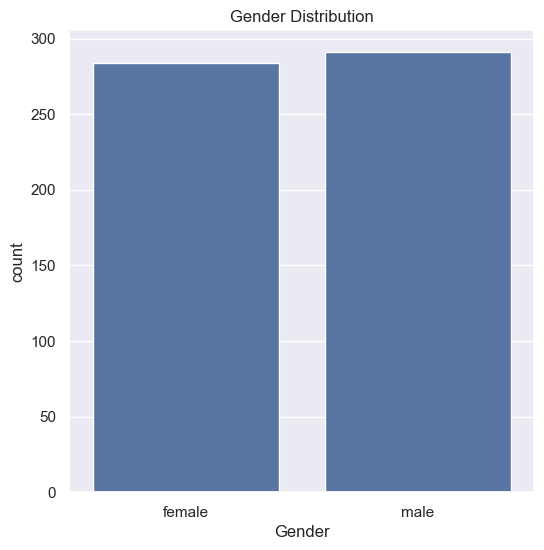

C:\Users\rajiv\AppData\Local\Temp\ipykernel_19968\2224139262.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


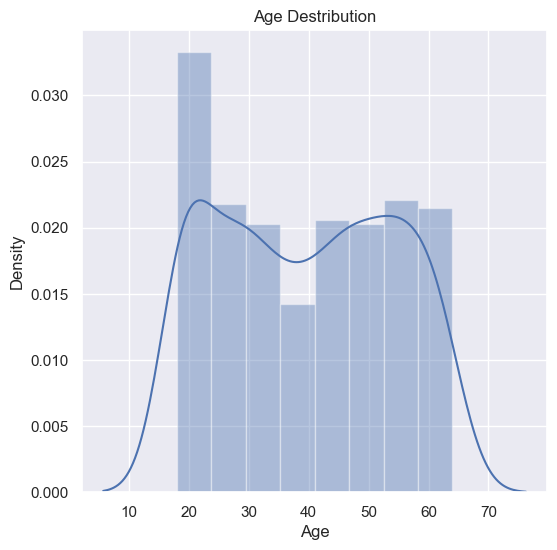

C:\Users\rajiv\AppData\Local\Temp\ipykernel_19968\2224139262.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


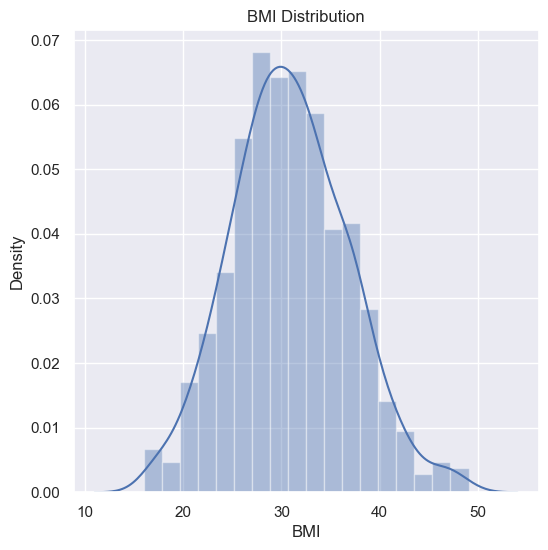

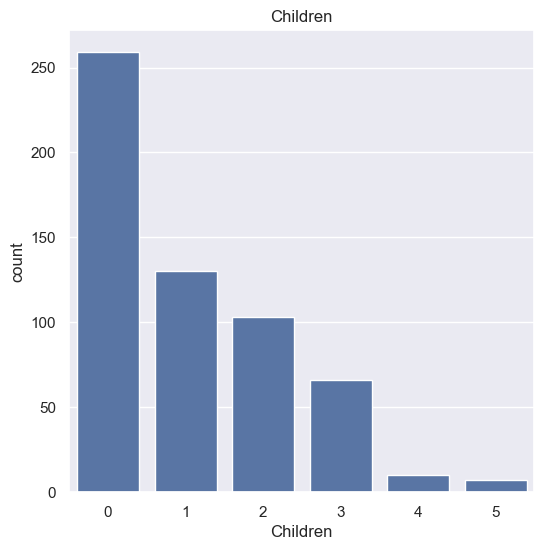

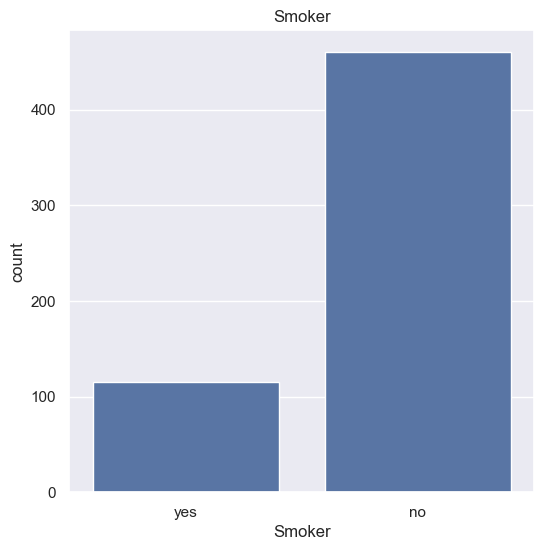

C:\Users\rajiv\AppData\Local\Temp\ipykernel_19968\2224139262.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Charges'])


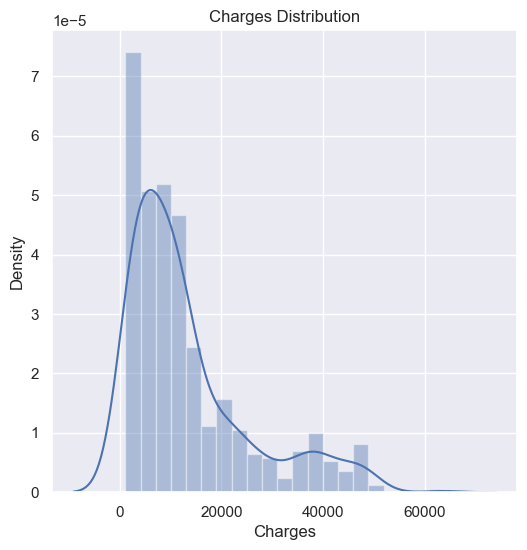

In [70]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.title('Age Destribution')
plt.show()
plt.figure(figsize=(6,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data=df)
plt.title('Children')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='Smoker', data=df)
plt.title('Smoker')
plt.show()
plt.figure(figsize=(6,6))
sns.distplot(df['Charges'])
plt.title('Charges Distribution')
plt.show()

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Charges'}>]], dtype=object)

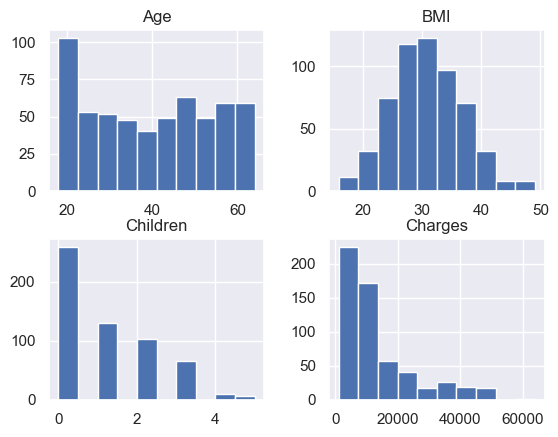

In [74]:
df.hist()

In [76]:
# encoding Gender column
df.replace({'Gender':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'Smoker':{'yes':0,'no':1}}, inplace=True)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_19968\1201712671.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}}, inplace=True)
C:\Users\rajiv\AppData\Local\Temp\ipykernel_19968\1201712671.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Smoker':{'yes':0,'no':1}}, inplace=True)


In [86]:
X = df.drop(columns='Charges', axis=1)
Y = df['Charges']
X


,Age,Gender,BMI,Children,Smoker
0,19,1,27.900,0,0
1,18,0,33.770,1,1
2,28,0,33.000,3,1
3,33,0,22.705,0,1
4,32,0,28.880,0,1
...,...,...,...,...,...
570,31,1,29.100,0,1
571,18,1,37.290,1,1
572,30,1,43.120,2,1
573,62,1,36.860,1,1


In [88]:
Y

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
570     3761.29200
571     2219.44510
572     4753.63680
573    31620.00106
574    13224.05705
Name: Charges, Length: 575, dtype: float64

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(575, 5) (460, 5) (115, 5)


In [94]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [96]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7301815397211868


In [98]:
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7955513370622873


In [112]:
input_data = (51,1,22.1,2,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[8537.96324626]
The insurance cost is  8537.963246262041


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
